In [1]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from Bio import SeqIO
from collections import Counter
%matplotlib inline

In [3]:
df = pd.read_csv('../dataframes/h3n2_ha_12y_hi.csv')
egg_df = df[df['passage']=='egg']

Text(0,0.5,'Number of egg-passaged sequences')

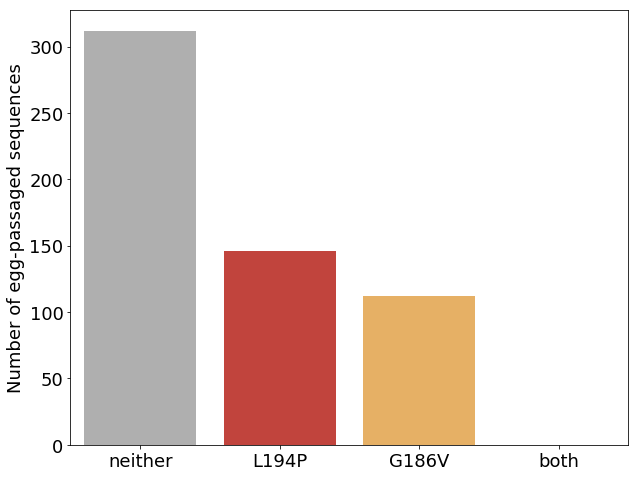

In [97]:
#Mutations at positions 186 and 194 are mutually exclusive
b_df = (egg_df.groupby(
    [egg_df['aa_mut186']=='G186V', 
     (egg_df['aa_mut194']=='L194P')
    ]).size().reset_index().rename(columns={0:'prevalence'}))

b_df['mut194_186'] = np.select(((b_df.aa_mut194==0)&(b_df.aa_mut186==0),
                                (b_df.aa_mut194==1)&(b_df.aa_mut186==0),
                                (b_df.aa_mut194==0)&(b_df.aa_mut186==1),
                                (b_df.aa_mut194==1)&(b_df.aa_mut186==1)
                               ),('neither','L194P','G186V','both'))

b_df = b_df.loc[:,['mut194_186', 'prevalence']]
b_df = b_df.append({'mut194_186': 'both', 'prevalence':0}, ignore_index=True)


fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='mut194_186',y='prevalence',data=b_df, ax=ax, palette=['#afafaf','#d73027','#fcb44f','#f47e43'])
ax.grid(False)
ax.tick_params(axis='both', labelsize=18)
plt.xlabel('', size=18)
plt.ylabel('Number of egg-passaged sequences', size=18)

Text(0,0.5,'Number of egg-passaged sequences')

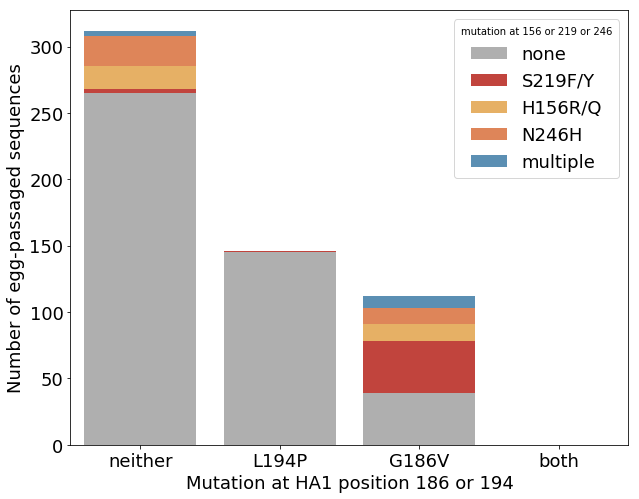

In [93]:
# Positions 156 and 219 do not mutate if 194 is mutated
c_df = (egg_df.groupby(
    [(egg_df['aa_mut186']=='G186V'), 
     (egg_df['aa_mut194']=='L194P'),
     (egg_df['mut156']==True),
     (egg_df['mut219']==True),
     (egg_df['mut246']==True),
    ]).size().reset_index().rename(columns={0:'prevalence'}))

c_df['mut194_186'] = np.select(((c_df.aa_mut194==0)&(c_df.aa_mut186==0),
                                (c_df.aa_mut194==1)&(c_df.aa_mut186==0),
                                (c_df.aa_mut194==0)&(c_df.aa_mut186==1),
                                (c_df.aa_mut194==1)&(c_df.aa_mut186==1)
                               ),('neither','194','186','both'))
c_df['mut156_219'] = np.select(((c_df.mut156==0)&(c_df.mut219==0)&(c_df.mut246==0),
                                (c_df.mut156==1)&(c_df.mut219==0)&(c_df.mut246==0),
                                (c_df.mut156==0)&(c_df.mut219==1)&(c_df.mut246==0),
                                (c_df.mut156==0)&(c_df.mut219==0)&(c_df.mut246==1),
                                (((c_df.mut156==1)&(c_df.mut219==1))|((c_df.mut156==1)&(c_df.mut246==1))|((c_df.mut219==1)&(c_df.mut246==1))),
                               ),('none','156','219','246','multiple'))
c_df = c_df.loc[:,['mut194_186','mut156_219', 'prevalence']]

n_219_156_246= [265,145,39,0]
only_219= [3,1,39,0]
only_156= [17,0,13,0]
only_246= [23,0,12,0]
m_219_156_246= [4,0,9,0]

r = [0,1,2,3]
bars= ['neither','L194P','G186V','both']


fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(r, n_219_156_246, color='#afafaf', label='none')
sns.barplot(r, only_219, bottom=n_219_156_246, color='#d73027', label='S219F/Y')
sns.barplot(r, only_156, bottom=np.array(n_219_156_246)+np.array(only_219), color='#fcb44f', label='H156R/Q')
sns.barplot(r, only_246, bottom=np.array(n_219_156_246)+np.array(only_219)+np.array(only_156), color='#f47e43', label='N246H')
sns.barplot(r, m_219_156_246, bottom=np.array(n_219_156_246)+np.array(only_219)+np.array(only_156)+np.array(only_246), color='#4c91c2', label='multiple')
plt.xticks(r, bars)
ax.tick_params(axis='both', labelsize=18)

plt.legend(title='mutation at 156 or 219 or 246',fontsize=18, loc=1)
ax.grid(False)
plt.xlabel('Mutation at HA1 position 186 or 194', size=18)
plt.ylabel('Number of egg-passaged sequences', size=18)

Text(0,0.5,'Number of egg-passaged sequences')

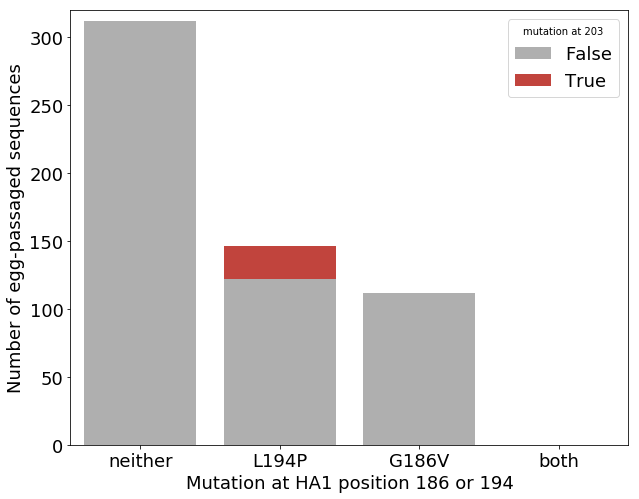

In [95]:
# T203I only mutates if L194P
d_df = (egg_df.groupby(
    [(egg_df['aa_mut186']=='G186V'), 
     (egg_df['aa_mut194']=='L194P'),
     (egg_df['mut203']==True),
    ]).size().reset_index().rename(columns={0:'prevalence'}))

d_df['mut194_186'] = np.select(((d_df.aa_mut194==0)&(d_df.aa_mut186==0),
                                (d_df.aa_mut194==1)&(d_df.aa_mut186==0),
                                (d_df.aa_mut194==0)&(d_df.aa_mut186==1),
                                (d_df.aa_mut194==1)&(d_df.aa_mut186==1)
                               ),('neither','L194P','G186V','both'))

d_df = d_df.loc[:,['mut194_186','mut203', 'prevalence']]

n_203= [312,122,112,0]
y_203= [0,24,0,0]

r = [0,1,2,3]
bars= ['neither','L194P','G186V','both']

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(r, n_203, color='#afafaf', label='False')
sns.barplot(r, y_203, bottom=n_203, color='#d73027', label='True')
plt.xticks(r, bars)
ax.tick_params(axis='both', labelsize=18)

plt.legend(title='mutation at 203',fontsize=18, loc=1)
ax.grid(False)
plt.ylim(0,320)
plt.xlabel('Mutation at HA1 position 186 or 194', size=18)
plt.ylabel('Number of egg-passaged sequences', size=18)